# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Create the list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [2]:
# Find the mean
total = sum(sales)
mean_sales = total/len(sales)
mean_sales

3052.714285714286

In [3]:
# Find the variance

# Write a function to substract the mean
def substract_mean(point):
  return point-mean_sales

# get distances from the mean using `map` to apply the function to the sales list
distances = list(map(substract_mean, sales))

# square and sum the distances
sq_distances = list(map(lambda x: x**2, distances))

# I will assume that the list is a population, because we do not have a sample of the sales, but all the sales for the next week
# Get the length of the list
length = len(sq_distances)-1

# Calculate the variance
variance_sales = sum(sq_distances)/length
print('{:.2f}'.format(variance_sales))


214387.90


In [4]:
# Find the standard deviation of sales
import math
std_sales = math.sqrt(variance_sales)
std_sales

463.0204150595357

In [0]:
# Define a function to calculate mean, variance and standard deviation
def mean_var_std(mylist):
  mean = sum(mylist)/len(mylist)
  distances = list(map(lambda x: x-mean, mylist))
  sq_distances = list(map(lambda x: x**2, distances))
  variance = sum(sq_distances)/(len(sq_distances)-1)
  standard_dev = math.sqrt(variance)
  return mean, variance, standard_dev

In [6]:
# Test the function
mean_var_std(sales)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [7]:
# Create the vector customers
customers = [127, 80, 105, 92, 120, 115, 93]

# Find the covariance between sales and the number of customers
import pandas as pd
df = pd.DataFrame({'sales': sales})
df['customers'] = pd.Series(customers)
cov_sc = df['sales'].cov(df['customers'])
cov_sc

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [8]:
# Find the standard deviation of customers
mean_cust = sum(customers)/len(customers)
distances = list(map(lambda x: x-mean_cust, customers))
sq_distances = list(map(lambda x: x**2, distances))
var_cust = sum(sq_distances)/(len(sq_distances)-1)
std_cust = math.sqrt(var_cust)
std_cust

17.057326313123664

In [9]:
# Calculate the denominatior
denom = std_sales * std_cust

# Calculate the correlation
corr_sc = cov_sc/denom
corr_sc

0.9628339778148909

In [10]:
# Check work using pandas
df['sales'].corr(df['customers'])

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [12]:
# read using pandas
titanic = pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [13]:
# Set the first column as index
titanic.set_index('Unnamed: 0', inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
Unnamed: 0,,,,,,,,,,,,,,,
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [14]:
# Calculate the covariance for the dataset
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [15]:
# Calculate the correlation for the dataset
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal is perpendicular

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Create two vectors
v_1 = np.array([-3,3])
v_2 = np.array([1.5, 1.5])

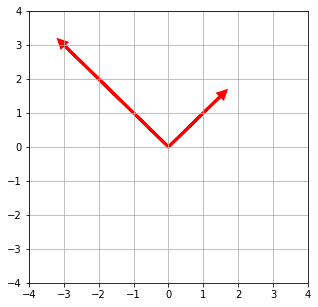

In [20]:
# Plot the vectors
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-4,4)
plt.ylim(-4,4)
for v in [v_1, v_2]:
  plt.arrow(0,0, v[0], v[1], head_width=.2, head_length=.2, linewidth=3, color='red')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [21]:
# Create the vectors
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

# Get the dot product
np.dot(a, b)

-40

Vectors a and b are not orthogonal, because the dot product is different from zero. Two vectors are orthogonals only if the dot product is zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [22]:
c = np.array([2, -15, 6, 20])
sq_norm_c = (np.linalg.norm(c))**2
dot_c = np.dot(c, c)
c_t = c.T
c_t_c = np.dot(c_t,c)
print("Squared norm:", sq_norm_c)
print("dot c:", dot_c)
print("c transpose * c:", c_t_c)
# All the quantities have the same value

Squared norm: 665.0
dot c: 665
c transpose * c: 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
 =>
d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix}
 + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
 = 7\hat{i} + 12\hat{j}
\qquad
\qquad
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
 =>
e = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}
 + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}
 - 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
 = 2\hat{i} + 11\hat{j} - 8\hat{k}
\qquad
\qquad
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [23]:
# Create vector f
f = np.array([4, 12, 11, 9, 2])
print("f:", f)
# Turn vector f into a unit vector
f_hat = f/np.linalg.norm(f)
print("f unit:", f_hat)

f: [ 4 12 11  9  2]
f unit: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

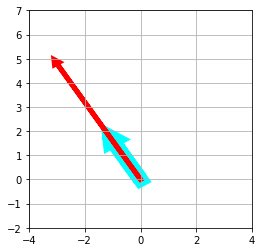

In [24]:
# Plot linearly dependent vectors
vector_1 = np.array([-1, 1.6])
vector_2 = np.multiply(vector_1, 3)

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4,4)          
plt.ylim(-2,7)

# Display the vectors
for myvect, mycolor, mywidth in [(vector_1, 'cyan', 15), 
                                 (vector_2, 'red', 5)]:
  plt.arrow(0,0, 
            myvect[0], 
            myvect[1], 
            head_width=.2, 
            head_length=.2, 
            linewidth=mywidth,
            color=mycolor)

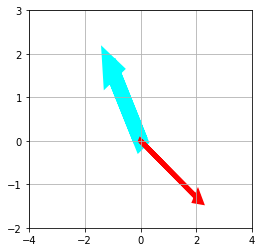

In [25]:
# Plot linearly independent vectors
vector_1 = np.array([-1, 1.6])
vector_2 = np.array([2, -1.3])

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4,4)          
plt.ylim(-2,3)

# Display the vectors
for myvect, mycolor, mywidth in [(vector_1, 'cyan', 15), 
                                 (vector_2, 'red', 5)]:
  plt.arrow(0,0, 
            myvect[0], 
            myvect[1], 
            head_width=.2, 
            head_length=.2, 
            linewidth=mywidth,
            color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

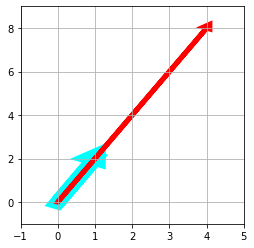

In [26]:
# Create vectors
g = np.array([1,2])
h = np.array([4,8])
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-1,9)

# Display
for myvect, mycolor, mywidth in [(g, 'cyan', 15), 
                                 (h, 'red', 5)]:
  plt.arrow(0,0, 
            myvect[0], 
            myvect[1], 
            head_width=.2, 
            head_length=.2, 
            linewidth=mywidth,
            color=mycolor)

Vectors g and h are linearly dependent, so the span of the vectors is the line provided by the equation g = 0.25 * h

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# Create the vectors
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]
vector_l = np.array([[0,0,0, l[0], l[1], l[2]]])
vector_m = np.array([[0,0,0, m[0], m[1], m[2]]])
vector_n = np.array([[0,0,0, n[0], n[1], n[2]]])

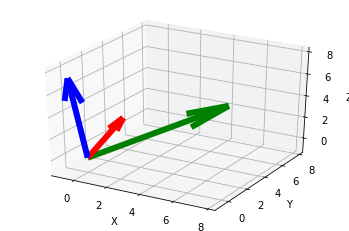

In [28]:
# Unzip the vectors
X_l, Y_l, Z_l, U_l, V_l, W_l = zip(*vector_l)
X_m, Y_m, Z_m, U_m, V_m, W_m = zip(*vector_m)
X_n, Y_n, Z_n, U_n, V_n, W_n = zip(*vector_n)

# Plot the vector on a graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1.2, 8.2])
ax.set_ylim([-1.2, 8.2])
ax.set_zlim([-1.2, 8.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.quiver(X_l, Y_l, Z_l, U_l, V_l, W_l, length=1, color='red', linewidth=6)
ax.quiver(X_m, Y_m, Z_m, U_m, V_m, W_m, length=1, color='blue', linewidth=6)
ax.quiver(X_n, Y_n, Z_n, U_n, V_n, W_n, length=1, color='green', linewidth=6)
plt.show();

The vectors are linearly independent, so the span of {l,m,n} is the three-dimensional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



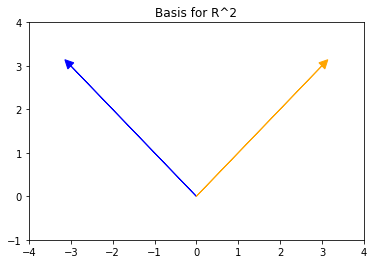

In [29]:
# find basis vectors in 2-d
vector_1 = [-3, 3]
vector_2 = [3, 3]

# Plot the Scaled Vectors
plt.xlim(-4,4)          
plt.ylim(-1,4)
plt.title("Basis for R^2")
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.2, head_length=0.2, color ='orange')
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis means to decompose a vector as the linear combination of the basis vectors and to span the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [30]:
# Create P
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])

# Find the Rank of P
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tell us the domension of the vector space spanned by the matrix columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Original vectors
v = np.array([1,3])
w = np.array([-1, 2])

In [0]:
# dot product
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [33]:
# projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction, v)
projection

array([0.5, 1.5])

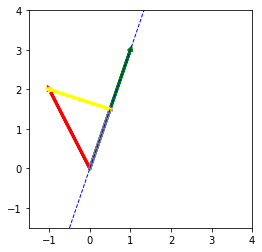

In [34]:
# Plot the line L and vector v on that line
x_minus_projection = w-projection

fig, ax = plt.subplots(figsize=(4,4))
# Axis Bounds
plt.xlim(-1.5,4)          
plt.ylim(-1.5,4)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, projection[0], projection[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(projection[0], projection[1], x_minus_projection[0], x_minus_projection[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

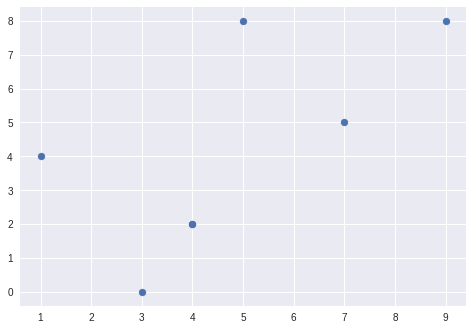

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()